
# Plot classification probability

Plot the classification probability for different classifiers. We use a 3 class
dataset, and we classify it with a Support Vector classifier, L1 and L2
penalized logistic regression (multinomial multiclass), a One-Vs-Rest version with
logistic regression, and Gaussian process classification.

Linear SVC is not a probabilistic classifier by default but it has a built-in
calibration option enabled in this example (`probability=True`).

The logistic regression with One-Vs-Rest is not a multiclass classifier out of
the box. As a result it has more trouble in separating class 2 and 3 than the
other estimators.


L1 logistic
Accuracy (train) for L1 logistic: 83.3%
L2 logistic (Multinomial)
Accuracy (train) for L2 logistic (Multinomial): 82.7%
L2 logistic (OvR)
Accuracy (train) for L2 logistic (OvR): 81.3%


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not us

Linear SVC
Accuracy (train) for Linear SVC: 82.0%
rbf SVC
Accuracy (train) for rbf SVC: 80.7%


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


GPC
Accuracy (train) for GPC: 82.7%


c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:186: UserWarning: The following kwargs were not used by contour: 'class_of_interest'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


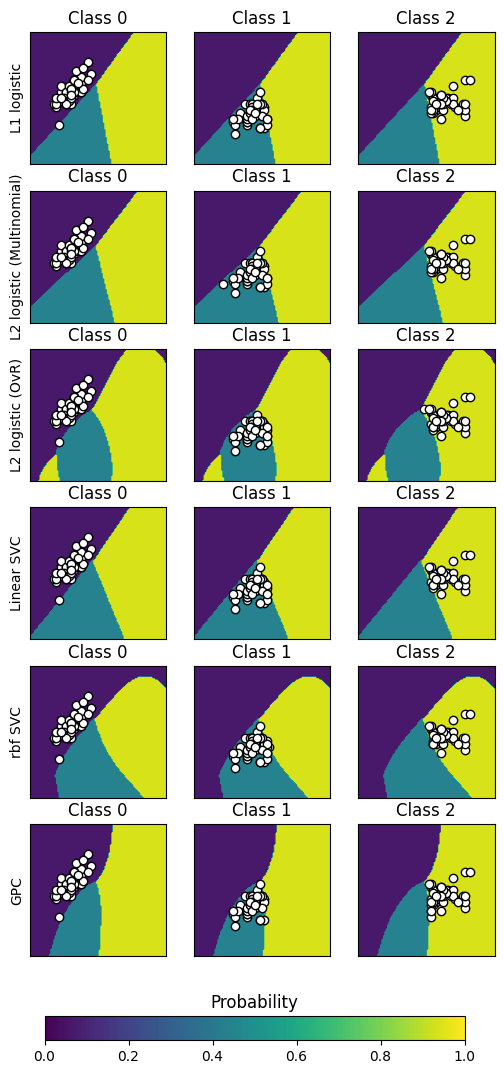

In [19]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(C=C, penalty="l1", solver="saga", max_iter=10000),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", max_iter=10000
    ),
    "L2 logistic (OvR)": OneVsRestClassifier(
        SVC(kernel="rbf", C=C, probability=True, random_state=0),
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "rbf SVC": SVC(kernel="rbf", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=len(iris.target_names),
    figsize=(3 * 2, n_classifiers * 2),
)

acc = []
for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    print(name)
    y_pred = classifier.fit(X, y).predict(X)
    accuracy = accuracy_score(y, y_pred)
    acc.append(accuracy)
    print(f"Accuracy (train) for {name}: {accuracy:0.1%}")
    for label in np.unique(y):
        # plot the probability estimate provided by the classifier
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict",
            class_of_interest=label,
            ax=axes[classifier_idx, label],
            vmin=0,
            vmax=2,
        )
        axes[classifier_idx, label].set_title(f"Class {label}")
        # plot data predicted to belong to given class
        mask_y_pred = y_pred == label
        axes[classifier_idx, label].scatter(
            X[mask_y_pred, 0], X[mask_y_pred, 1], marker="o", c="w", edgecolor="k"
        )
        axes[classifier_idx, label].set(xticks=(), yticks=())
    axes[classifier_idx, 0].set_ylabel(name)

ax = plt.axes([0.15, 0.04, 0.7, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="viridis"), cax=ax, orientation="horizontal"
)

plt.show()

In [25]:
classifiers.items()

dict_items([('L1 logistic', LogisticRegression(C=10, max_iter=10000, penalty='l1', solver='saga')), ('L2 logistic (Multinomial)', LogisticRegression(C=10, max_iter=10000, solver='saga')), ('L2 logistic (OvR)', OneVsRestClassifier(estimator=SVC(C=10, probability=True, random_state=0))), ('Linear SVC', SVC(C=10, kernel='linear', probability=True, random_state=0)), ('rbf SVC', SVC(C=10, probability=True, random_state=0)), ('GPC', GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=[1, 1])))])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'rbf SVC'),
  Text(1, 0, 'L2 logistic (OvR)'),
  Text(2, 0, 'Linear SVC'),
  Text(3, 0, 'L2 logistic (Multinomial)'),
  Text(4, 0, 'GPC'),
  Text(5, 0, 'L1 logistic')])

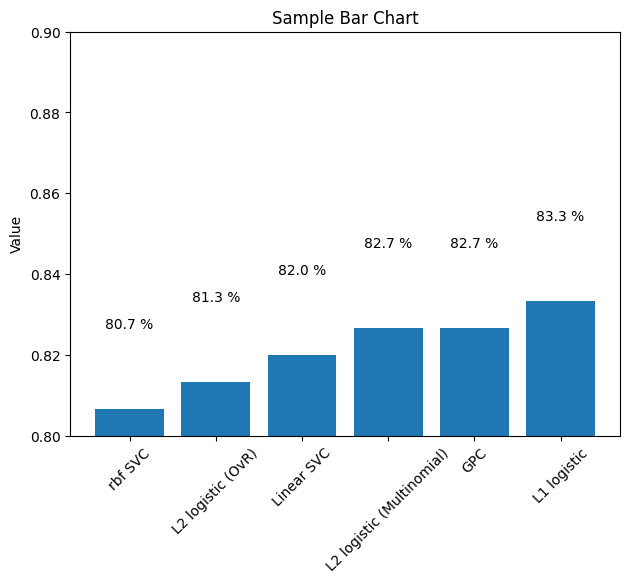

In [47]:


# Sample data
values = acc
names = list(classifiers.keys())

# Sorting the data in ascending order
sorted_indices = sorted(range(len(values)), key=lambda k: values[k])
sorted_values = [values[i] for i in sorted_indices]
sorted_names = [names[i] for i in sorted_indices]
plt.ylim(0.8,0.9)
# Plotting the bar chart
plt.bar(sorted_names, sorted_values)

# # Adding value labels on top of the bars
for i, value in enumerate(sorted_values):
    plt.text(i, value +0.02 , f'{100 *value:.1f} %', ha='center')

# Setting the y-axis label
plt.ylabel('Value')

# Setting the title
plt.title('Sample Bar Chart')
plt.tight_layout()
plt.xticks(rotation = 45)


### One-vs-Rest (OVR) Classification

#### Concept

One-vs-Rest (OVR) is a strategy used for multi-class classification problems. It involves training a separate binary classifier for each class. Each classifier predicts whether a given instance belongs to its respective class or not. During prediction, the classifier with the highest confidence score is chosen as the predicted class.

#### Mathematical Background

Given $\ K $ classes, the OVR strategy constructs $\ K $ binary classifiers. For the $\ k $-th classifier, the labels are transformed as follows:

$\
y_i^{(k)} = 
\begin{cases} 
1 & \text{if } y_i = k \\
0 & \text{otherwise}
\end{cases}
$

Each classifier is trained to distinguish between the class $\ k $ and the other classes. During prediction, the instance $\ \vec{x} $ is classified into the class with the highest predicted probability:

$\
\hat{y} = \arg\max_k P(y = k | \vec{x})
$

where $\ P(y = k | \vec{x}) $ is the probability estimated by the $\ k $-th classifier.

#### Arguments in Sklearn Implementation

When using OVR in scikit-learn, it's typically used with classifiers that support binary classification, such as Logistic Regression, Support Vector Machines (SVM), etc. The `OneVsRestClassifier` is a meta-estimator that enables this strategy.

```python
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Example of using OVR with SVM
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear'))

# Fit the model
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = ovr_classifier.predict(X_test)


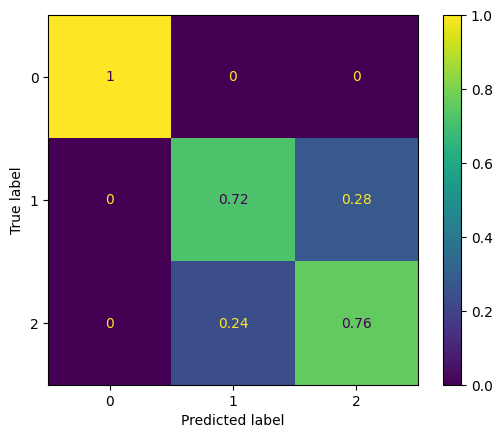

In [10]:
ConfusionMatrixDisplay.from_estimator(classifier,X,y,normalize = 'true')

### Interpretation of the Multi-Class Classification Probability Plots

The image consists of probability plots for different classification models applied to a dataset with three classes (Class 0, Class 1, and Class 2). Each row represents a different classifier, and each column represents the probability of belonging to one of the three classes.

#### Axes and Values

- **X and Y Axes**: The axes represent the feature space of the dataset. Each point in this space corresponds to a pair of feature values for the samples in the dataset.
- **Colors**: The color of each region in the plots indicates the predicted probability of belonging to a particular class. The color bar at the bottom shows the gradient from 0 (dark blue) to 1 (yellow), representing the probability values.
  - Dark Blue: Low probability (close to 0)
  - Yellow: High probability (close to 1)
  - Green: Intermediate probability values
- **White Circles**: These are the data points from the dataset. The positions of these points in the feature space indicate their feature values.

#### Rows (Classifiers)

1. **L1 Logistic Regression**:
   - Uses L1 regularization which can lead to sparse models.
   - Each plot shows the probability of the sample belonging to Class 0, Class 1, or Class 2, respectively.

2. **L2 Logistic Regression (Multinomial)**:
   - Uses L2 regularization and considers the joint probability across classes.
   - Provides smoother decision boundaries compared to L1.

3. **L2 Logistic Regression (One-vs-Rest, OVR)**:
   - Also uses L2 regularization but fits one classifier per class (binary problem for each class).
   - Can result in different decision boundaries compared to multinomial.

4. **Linear Support Vector Classifier (SVC)**:
   - A linear SVM classifier that finds the hyperplane that best separates the classes.
   - The decision boundaries may be more rigid compared to logistic regression models.

5. **Gaussian Process Classifier (GPC)**:
   - A non-linear classifier that uses Gaussian processes.
   - Can model more complex decision boundaries and capture the uncertainty in the classification.

#### Columns (Classes)

1. **Class 0**:
   - The first column shows the probability of each sample belonging to Class 0.
   - Yellow regions indicate high probability of being Class 0, blue regions indicate low probability.

2. **Class 1**:
   - The second column shows the probability of each sample belonging to Class 1.
   - Yellow regions indicate high probability of being Class 1, blue regions indicate low probability.

3. **Class 2**:
   - The third column shows the probability of each sample belonging to Class 2.
   - Yellow regions indicate high probability of being Class 2, blue regions indicate low probability.

#### Interpretation

- The plots help visualize how each classifier separates the feature space into different classes.
- The decision boundaries are where the colors change, indicating where the classifier is uncertain between two or more classes.
- The different regularization techniques and classifier types result in varying shapes and smoothness of decision boundaries.
- Comparing the plots allows you to see which classifier provides the best separation for the given dataset, considering both the location of the data points and the structure of the decision boundaries.
